In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from sklearn.preprocessing import MinMaxScaler

# Diagramm 1

In [2]:
noten_dhbw = np.random.normal(2.5, 0.5, 500)
noten_dhbw = noten_dhbw.clip(min=1.0, max=4.0)
noten_dhbw = np.round(noten_dhbw, 1)
noten_uni = np.random.normal(2.4, 0.4, 500)
noten_uni = noten_uni.clip(min=1.0, max=4.0)
noten_uni = np.round(noten_uni, 1)

scaler = MinMaxScaler(feature_range=(40_000, 65_000))
gehalt_dhbw = scaler.fit_transform(noten_dhbw.reshape(-1, 1))
gehalt_dhbw = gehalt_dhbw.flatten()
gehalt_dhbw += np.random.normal(3000, 1000, 500)
gehalt_uni = scaler.fit_transform(noten_uni.reshape(-1, 1))
gehalt_uni = gehalt_uni.flatten()
gehalt_uni += np.random.normal(5000, 2000, 500)

zeit_dhbw = np.zeros(500)
zeit_dhbw[-100:] = 1
zeit_dhbw[-10:] = 2
zeit_uni = np.zeros(500)
zeit_uni[-100:] = 1
zeit_uni[-20:] = 2

gehalt_dhbw[-100:] -= 2000
gehalt_dhbw[-20:] -= 3000
gehalt_uni[-100:] -= 1500
gehalt_uni[-20:] -= 2500

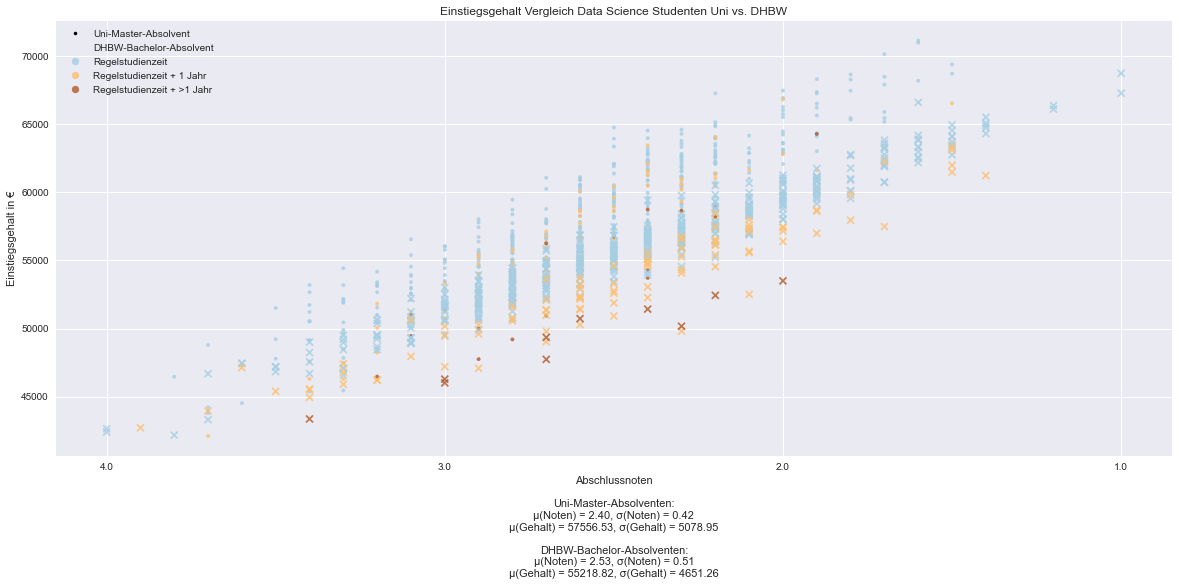

In [3]:
plt.figure(figsize=(20, 8))

plt.title("Einstiegsgehalt Vergleich Data Science Studenten Uni vs. DHBW")
plt.xlabel("Abschlussnoten"
           f"\n\nUni-Master-Absolventen:\nµ(Noten) = {noten_uni.mean():.2f}, σ(Noten) = {noten_uni.std():.2f}\nµ(Gehalt) = {gehalt_uni.mean():.2f}, σ(Gehalt) = {gehalt_uni.std():.2f}"
           f"\n\nDHBW-Bachelor-Absolventen:\nµ(Noten) = {noten_dhbw.mean():.2f}, σ(Noten) = {noten_dhbw.std():.2f}\nµ(Gehalt) = {gehalt_dhbw.mean():.2f}, σ(Gehalt) = {gehalt_dhbw.std():.2f}"
          )

plt.xticks(np.arange(0, 5), np.arange(1., 6.)[::-1])
plt.ylabel("Einstiegsgehalt in €")

sc1 = plt.scatter(x=noten_uni, y=gehalt_uni, marker=".", label="Uni-Master-Absolvent", c=zeit_uni, cmap="Paired", alpha=0.8)
plt.scatter(x=noten_dhbw, y=gehalt_dhbw, marker="x", label="DHBW-Bachelor-Absolvent", c=zeit_dhbw, cmap="Paired", alpha=0.8)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
legend_values = [f(".", "k"), f("x", "k")]
legend_values.extend(sc1.legend_elements()[0])
    
legend_names = ["Uni-Master-Absolvent", "DHBW-Bachelor-Absolvent", "Regelstudienzeit", "Regelstudienzeit + 1 Jahr", "Regelstudienzeit + >1 Jahr"]
plt.legend(handles=legend_values, labels=legend_names)
plt.show()

# Diagramm 2

In [109]:
studien = ["Data Science", "Maschinenbau", "Sales & Consulting", "Elektrotechnik", "Medizin"]

weiten = np.empty((5, 60))
weiten[0] = np.random.normal(7, 2, 60)
weiten[1] = np.random.normal(8.5, 0.5, 60)
weiten[2] = np.random.normal(7.5, 0.4, 60)
weiten[3] = np.random.normal(8, 0.8, 60)
weiten[4] = np.random.normal(6, 2, 60)

weiten = weiten.clip(min=4, max=12)

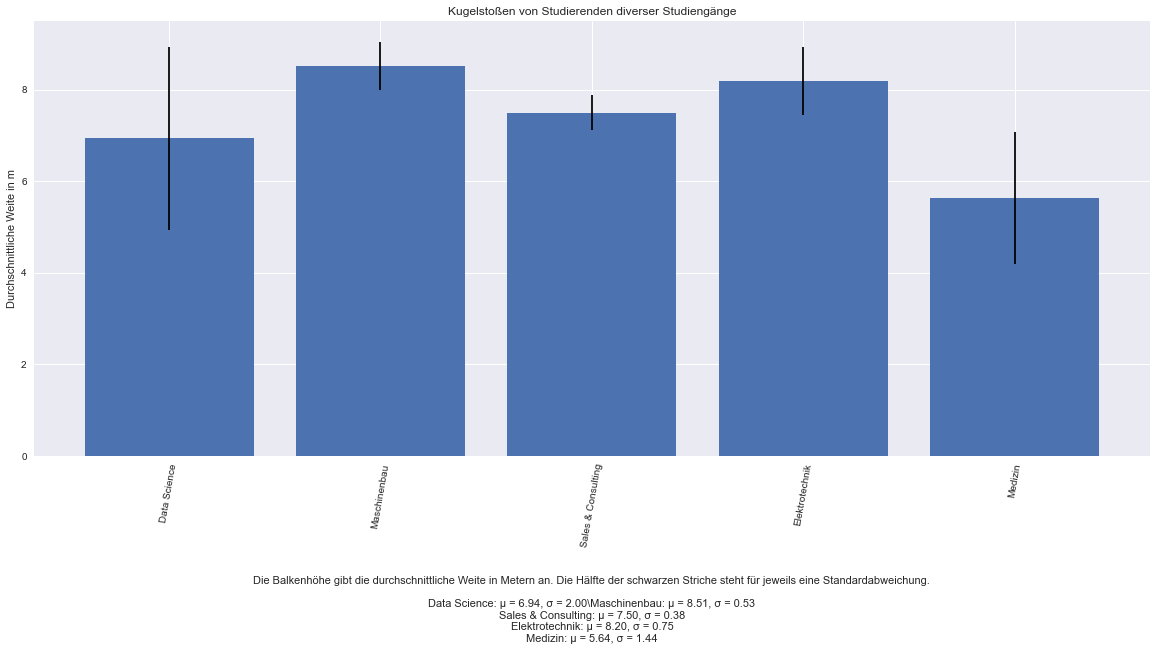

In [110]:
plt.figure(figsize=(20, 8))

plt.title("Kugelstoßen von Studierenden diverser Studiengänge")
plt.xlabel(f"\n\nDie Balkenhöhe gibt die durchschnittliche Weite in Metern an. Die Hälfte der schwarzen Striche steht für jeweils eine Standardabweichung."
           f"\n\nData Science: µ = {weiten[0].mean():.2f}, σ = {weiten[0].std():.2f}"
           f"\Maschinenbau: µ = {weiten[1].mean():.2f}, σ = {weiten[1].std():.2f}"
           f"\nSales & Consulting: µ = {weiten[2].mean():.2f}, σ = {weiten[2].std():.2f}"
           f"\nElektrotechnik: µ = {weiten[3].mean():.2f}, σ = {weiten[3].std():.2f}"
           f"\nMedizin: µ = {weiten[4].mean():.2f}, σ = {weiten[4].std():.2f}"
          )
plt.xticks(rotation=80)
plt.ylabel("Durchschnittliche Weite in m")

# plt.boxplot(weiten, labels=studien, patch_artist=True)
plt.bar(x=studien, height=[i.mean() for i in weiten], yerr=[i.std() for i in weiten])
# plt.style.use("seaborn")

plt.show()

# Diagramm 3

In [111]:
data_3 = pd.DataFrame(columns=["height", "weight", "year"])

base_height, base_weight = 110, 20
years = [1980, 2000, 2020]

for idx, year in enumerate(years):
    base_height += base_height / (idx + 1) * 0.1
    base_weight += base_weight / (idx + 1) * 0.15
    
    stats = np.array([np.repeat(base_height, 100), np.repeat(base_weight, 100), np.repeat(year, 100)])
    
    stats[0] += np.random.normal(0, 3, 100)
    stats[1] += np.random.normal(0, 1, 100)
    
    df = pd.DataFrame()
    df["height"] = stats[0]
    df["weight"] = stats[1]
    df["year"] = year
    
    data_3 = data_3.append(df)
    
data_3.shape

(300, 3)

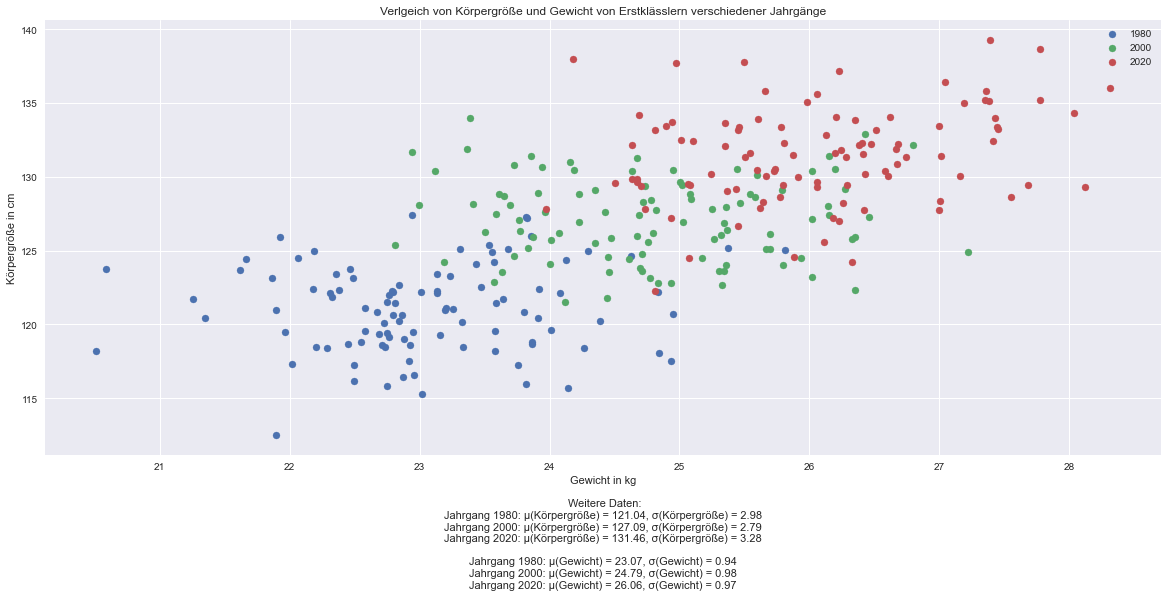

In [112]:
plt.figure(figsize=(20, 8))

plt.title("Verlgeich von Körpergröße und Gewicht von Erstklässlern verschiedener Jahrgänge")
plt.xlabel(f"Gewicht in kg\n\n Weitere Daten:"
           f"\nJahrgang 1980: µ(Körpergröße) = {data_3[data_3['year'] == 1980.0]['height'].mean():.2f}, σ(Körpergröße) = {data_3[data_3['year'] == 1980.0]['height'].std():.2f}"
           f"\nJahrgang 2000: µ(Körpergröße) = {data_3[data_3['year'] == 2000.0]['height'].mean():.2f}, σ(Körpergröße) = {data_3[data_3['year'] == 2000.0]['height'].std():.2f}"
           f"\nJahrgang 2020: µ(Körpergröße) = {data_3[data_3['year'] == 2020.0]['height'].mean():.2f}, σ(Körpergröße) = {data_3[data_3['year'] == 2020.0]['height'].std():.2f}"
           "\n"
           f"\nJahrgang 1980: µ(Gewicht) = {data_3[data_3['year'] == 1980.0]['weight'].mean():.2f}, σ(Gewicht) = {data_3[data_3['year'] == 1980.0]['weight'].std():.2f}"
           f"\nJahrgang 2000: µ(Gewicht) = {data_3[data_3['year'] == 2000.0]['weight'].mean():.2f}, σ(Gewicht) = {data_3[data_3['year'] == 2000.0]['weight'].std():.2f}"
           f"\nJahrgang 2020: µ(Gewicht) = {data_3[data_3['year'] == 2020.0]['weight'].mean():.2f}, σ(Gewicht) = {data_3[data_3['year'] == 2020.0]['weight'].std():.2f}"
)
plt.ylabel("Körpergröße in cm")

plt.scatter(x=data_3[data_3["year"] == 1980.0]["weight"], y=data_3[data_3["year"] == 1980.0]["height"], label="1980")
plt.scatter(x=data_3[data_3["year"] == 2000.0]["weight"], y=data_3[data_3["year"] == 2000.0]["height"], label="2000")
plt.scatter(x=data_3[data_3["year"] == 2020.0]["weight"], y=data_3[data_3["year"] == 2020.0]["height"], label="2020")

plt.legend()
plt.show()

# Diagramm 4

In [113]:
time = np.arange(0, 30)
accidents = np.array(np.random.normal(20, 10, 30), dtype=np.int16)
consumed = np.random.normal(1000, 200, 30)

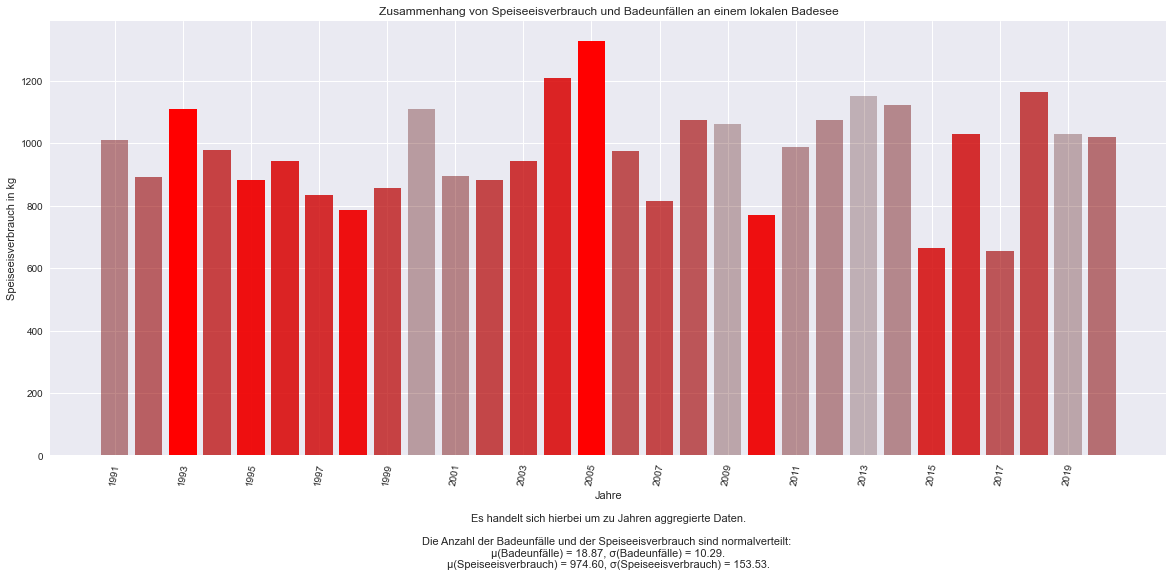

In [116]:
plt.figure(figsize=(20, 8))

plt.title("Zusammenhang von Speiseeisverbrauch und Badeunfällen an einem lokalen Badesee")
plt.xlabel(f"Jahre\n\n Es handelt sich hierbei um zu Jahren aggregierte Daten. "
           "\n\nDie Anzahl der Badeunfälle und der Speiseeisverbrauch sind normalverteilt: "
           f"\nµ(Badeunfälle) = {accidents.mean():.2f}, σ(Badeunfälle) = {accidents.std():.2f}."
           f"\nµ(Speiseeisverbrauch) = {consumed.mean():.2f}, σ(Speiseeisverbrauch) = {consumed.std():.2f}.")
plt.xticks(np.arange(0, 30, 2), np.arange(1991, 2021, 2), rotation=80)
plt.ylabel("Speiseeisverbrauch in kg")

scaler = MinMaxScaler(feature_range=(0.25, 1))
alphas = scaler.fit_transform(accidents.reshape(-1,1))

rgba_colors = np.zeros((30, 4))
rgba_colors[:,0] = alphas.flatten()
rgba_colors[:,1] = 0
rgba_colors[:,2] = 0
rgba_colors[:,3] = alphas.flatten()

plt.bar(x=time, height=consumed, color=rgba_colors, label="Badeunfälle")

# cb = plt.colorbar()
plt.show()